# CSC7700 Homework 1


### Due Feb. 18th, by end of day. 
### Do all your work on this notebook and submit your notebook by email to zhang@csc.lsu.edu 
### (Rename your notebook to Huasong.Shan.HW1.ipynb)


In [52]:

import pandas as pd
from collections import Counter
import matplotlib
import numpy as np
import matplotlib.pyplot as pl
import numpy as np

#%matplotlib inline
#x = np.linspace(0, 3*np.pi, 500)
#plt.plot(x, np.sin(x**2))
#plt.title('A simple chirp')
#plt.show()

## Prostate Cancer Dataset

Gene expression measurements for samples of prostate tumors and adjacent prostate tissue not containing tumor.

Platform: Affymetrix Human Genome U95Av2 Array

Diagnostic classes:
* normal tissue (normal): 50 examples (49.0%)
* prostate tumor (tumor): 52 examples (51.0%)

Number of genes: 12533 <br>
Number of samples: 102

In [53]:
import pandas as pd
data = pd.read_pickle('/home/hudson/Downloads/prostate.df')
data.head(2)

,t,31308_at,31309_r_at,31310_at,31311_at,31312_at,31313_at,31314_at,31315_at,31316_at,31317_r_at,31318_at,31319_at,31320_at,31321_at,31322_at,31323_r_at,31324_at,31325_at,31326_at,
0,-11.4,2.7,0.6,4.3,28,0.3,-17.5,-5.4,7.5,-0.9,176,-0.3,4.5,-56.200001,21.4,0,-5,94.900002,-22,-70.900002,...
1,-1.0,-1.0,0.0,-1.0,3,0.0,-3.0,1.0,-2.0,0.0,27,0.0,-1.0,-5.000000,6.0,1,-11,2.000000,-4,0.000000,...


In [54]:
y = data.values[:, -1]
print y.shape, Counter(y.tolist())
x = data.values[:, :-1]
print x.shape

(102,) Counter({'tumor': 52, 'normal': 50})
(102, 12533)


## Task 1

(You can use DecisionTree implementation from scikit-learn.) 

Try decision tree on the above dataset. consider different values for the max depth of the tree ('max_depth') and min number of samples required to be a leaf node ('min-samples_leaf'). Conduct 10-fold cross-validation and: 

    - plot training error and testing error v.s. tree depth
    - plot training error and testing error v.s. min. sample for leaf nodes
    
Error should be measured by percentage of misclassification (i.e., return 'normal' for 'tumor' and vice versa).    

In [58]:
from sklearn import tree
from sklearn import metrics
from sklearn.cross_validation import KFold
n_folds = 10
#10 fold cross-validation
kf = KFold(len(y), n_folds=n_folds)




In [59]:
# vary the depth of decision trees
max_depth = np.arange(1, 25)

avg_train_err = np.zeros(len(max_depth))
avg_test_err = np.zeros(len(max_depth))

for i, d in enumerate(max_depth):
    #print '\n',i,d
    train_errors = np.zeros(n_folds)
    test_errors = np.zeros(n_folds)
    index = 0
    for train_index, test_index in kf:
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #print X_train.shape, X_test.shape, y_train.shape, y_test.shape        
        clf=tree.DecisionTreeClassifier(max_depth=d)
        clf.fit(X_train,y_train)
        train_errors[index] = metrics.accuracy_score(y_train,clf.predict(X_train))
        test_errors[index] = metrics.accuracy_score(y_test,clf.predict(X_test))
        index += 1
    avg_train_err[i] = np.mean(train_errors)
    avg_test_err[i] = np.mean(test_errors)

print avg_train_err
print avg_test_err

[ 0.90635452  0.98365982  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.        ]
[ 0.83636364  0.80636364  0.80636364  0.76636364  0.81454545  0.78636364
  0.81272727  0.81545455  0.84272727  0.80545455  0.74727273  0.80454545
  0.76636364  0.82454545  0.81545455  0.76454545  0.75636364  0.83545455
  0.76727273  0.80545455  0.74636364  0.84454545  0.73727273  0.73818182]


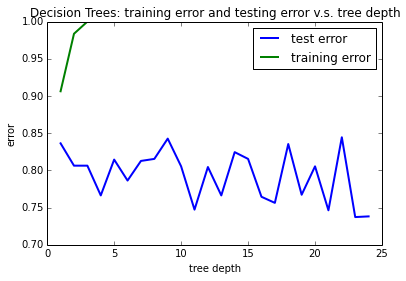

In [60]:
plt.title('Decision Trees: training error and testing error v.s. tree depth')
pl.plot(max_depth, avg_test_err, lw=2, label = 'test error')
pl.plot(max_depth, avg_train_err, lw=2, label = 'training error')
pl.legend()
pl.xlabel('tree depth')
pl.ylabel('error')

pl.show()


In [61]:
# vary the min. sample for leaf nodes of decision trees
n_x_samples = np.arange(1, 25)

avg_train_err = np.zeros(len(n_x_samples))
avg_test_err = np.zeros(len(n_x_samples))
for i, d in enumerate(n_x_samples):
    #print '\n',i,d
    train_errors = np.zeros(n_folds)
    test_errors = np.zeros(n_folds)
    index = 0
    for train_index, test_index in kf:
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #print X_train.shape, X_test.shape, y_train.shape, y_test.shape        
        #clf=tree.DecisionTreeClassifier(max_depth=d)
        clf=tree.DecisionTreeClassifier(min_samples_leaf=d)
        clf.fit(X_train,y_train)
        train_errors[index] = metrics.accuracy_score(y_train,clf.predict(X_train))
        test_errors[index] = metrics.accuracy_score(y_test,clf.predict(X_test))
        index += 1
    avg_train_err[i] = np.mean(train_errors)
    avg_test_err[i] = np.mean(test_errors)

print avg_train_err
print avg_test_err

[ 1.          0.98692069  0.97494028  0.96295987  0.96077401  0.95858815
  0.95205447  0.94550884  0.9378882   0.93026756  0.92700669  0.92048495
  0.91613712  0.91396321  0.91070234  0.90635452  0.90635452  0.90635452
  0.90635452  0.90635452  0.90635452  0.90635452  0.90635452  0.90635452]
[ 0.77727273  0.78727273  0.76818182  0.83454545  0.79454545  0.80454545
  0.84363636  0.81454545  0.78454545  0.76363636  0.68636364  0.67636364
  0.71636364  0.71636364  0.67636364  0.68636364  0.83636364  0.83636364
  0.83636364  0.83636364  0.83636364  0.83636364  0.83636364  0.83636364]


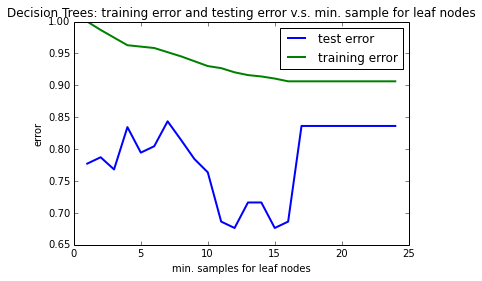

In [62]:
plt.title('Decision Trees: training error and testing error v.s. min. sample for leaf nodes')
pl.plot(max_depth, avg_test_err, lw=2, label = 'test error')
pl.plot(max_depth, avg_train_err, lw=2, label = 'training error')
pl.legend()
pl.xlabel('min. samples for leaf nodes')
pl.ylabel('error')

pl.show()

## Task 2

Implement 2-class logistic regression using theano. <br>
Use (stochastic) gradient descending to minimize negative loglikelihood of the data and obtain the value for the parameters. <br>
(You must use the probability as defined on the lecture notes.) <br>
(You cannot use any existing implementation of logistic regression or (stochastic) gradient descending. You must implement these yourself.)

    - plot negative loglikelihood v.s. iteration for your SGD.


Investigate how different starting values for the parameters affect the final negative loglikelihood. 

    - report the final neg. loglike. for 1) all parameters are initialized to be zero; 2) they are initialized to random values within a range of your choice.  

Conduct 10-fold cross-validation, 

    - report the training error and the test error. 
    
Add L1-regularization to your model, i.e., the optimization should minimize 

$$nll + c*\sum_i |W_i|$$

where nll is the neg. log likelihood and W is the parameter vector (except the bias). Try different values for c
and conduct 10-fold cross-validation. Plot:

    - number of non-zero parameters v.s. c
    - 10-fold cross-validation test error v.s. c 